In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#データのインポート
train_data = pd.read_csv('train1.csv')
test_data = pd.read_csv('test1.csv')

In [3]:
X_train=train_data.drop('SalePrice',axis=1)
y_train=train_data[['SalePrice']]
X_train_data=train_data.drop('SalePrice',axis=1)
y_train_data=train_data[['SalePrice']]
X_test=test_data

In [4]:
X_train.columns[X_train.isnull().sum()!=0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
X_train=X_train.drop(['Id'] ,axis=1)
X_test=X_test.drop(['Id'] ,axis=1)

In [6]:
# データ補完
# 無を表す欠損値
X_train['MasVnrType']=X_train['MasVnrType'].fillna('None')
X_train['FireplaceQu']=X_train['FireplaceQu'].fillna('NA')
X_train['PoolQC']=X_train['PoolQC'].fillna('NA')
X_train['Alley']=X_train['Alley'].fillna('NA')
X_train['Fence']=X_train['Fence'].fillna('NA')
X_train['MiscFeature']=X_train['MiscFeature'].fillna('NA')
X_train.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
=X_train.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
.fillna('NA')
X_train.loc[:,['GarageType','GarageFinish', 'GarageQual', 'GarageCond']]\
=X_train.loc[:,['GarageType','GarageFinish','GarageQual', 'GarageCond']].fillna('NA')

#無に対応して、0を表す欠損値 
X_train.loc[:,['GarageCars', 'GarageArea']]\
=X_train.loc[:,['GarageCars', 'GarageArea']].fillna(0)
X_train.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]\
=X_train.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(0)
X_train['MasVnrArea']=X_train['MasVnrArea'].fillna(0.0)


# 相関があるため、回帰補完をする欠損値
X_train['LotFrontage']=X_train.interpolate(method='linear')['LotFrontage']

# 最頻値で埋める欠損値
X_train['Electrical']=X_train['Electrical'].fillna('SBrkr')

# ガレージがない
X_train['GarageYrBlt'][X_train['GarageYrBlt'].isnull()]=X_train['YearBuilt'][X_train['GarageYrBlt'].isnull()]

# まるめが起きている
X_train['YearRemodAdd'][X_train['YearRemodAdd']>60]=X_train['YearBuilt'][X_train['YearRemodAdd']>60]

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# テストデータにも同じ
X_test['MasVnrArea']=X_test['MasVnrArea'].fillna(0.0)
X_test['MasVnrType']=X_test['MasVnrType'].fillna('None')
X_test['FireplaceQu']=X_test['FireplaceQu'].fillna('NA')
X_test['PoolQC']=X_test['PoolQC'].fillna('NA')
X_test['MiscFeature']=X_test['MiscFeature'].fillna('NA')
X_test['Electrical']=X_test['Electrical'].fillna('SBrkr')
X_test['LotFrontage']=X_test.interpolate(method='linear')['LotFrontage']
X_test['GarageYrBlt'][X_test['GarageYrBlt'].isnull()]=X_test['YearBuilt'][X_test['GarageYrBlt'].isnull()]

X_test.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
=X_test.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]\
.fillna('NA')
X_test.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]\
=X_test.loc[:,['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].fillna(0)

X_test.loc[:,['GarageType','GarageFinish', 'GarageQual', 'GarageCond']]\
=X_test.loc[:,['GarageType','GarageFinish','GarageQual', 'GarageCond']].fillna('NA')
X_test.loc[:,['GarageCars', 'GarageArea']]\
=X_test.loc[:,['GarageCars', 'GarageArea']].fillna(0)
X_test['YearRemodAdd'][X_test['YearRemodAdd']>60]=X_test['YearBuilt'][X_test['YearRemodAdd']>60]

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
# 欠損値がないか確認
X_train.isnull().sum()[X_train.isnull().sum()!=0]

Series([], dtype: int64)

In [9]:
# 特徴量の設計

# 建設年,改修年,販売年を2011年からの経過年数に変換
X_train.loc[:,['YearBuilt']]=2011-X_train.loc[:,['YearBuilt']]
X_train.loc[:,['YearRemodAdd']]=2011-X_train.loc[:,['YearRemodAdd']]
X_train['YrSold']=2011-X_train['YrSold']
X_train['GarageYrBlt']=2011-X_train['GarageYrBlt']

X_test.loc[:,['YearBuilt']]=2011-X_test.loc[:,['YearBuilt']]
X_test.loc[:,['YearRemodAdd']]=2011-X_test.loc[:,['YearRemodAdd']]
X_test['YrSold']=2011-X_train['YrSold']
X_test['GarageYrBlt']=2011-X_train['GarageYrBlt']

In [10]:
#新しい特徴量の作成

# 1階２階地下の面積を合計
X_train['TotalFlrSF']=X_train['1stFlrSF']+X_train['2ndFlrSF']+X_train['TotalBsmtSF']

# 敷地面積と地下の面積を合計
X_train["TotalSFforHouse"] = X_train["GrLivArea"] + X_train["TotalBsmtSF"]

# 1階２階地下の面積の合計からLowQualの面積をひく
X_train['Total-LowQual']=X_train['TotalFlrSF']-X_train['LowQualFinSF']

# 改修した年から(売れた年+売れた月/12)だけ引き、改修してからどれくらいで売れたかを見る(マイナスにならないよう＋１する)
X_train['YrMoSold']=X_train['YearRemodAdd']+1-(X_train['YrSold']+X_train['MoSold']/12)

In [11]:
# 回帰のため目的変数を対数変換し擬似正規分布化
y_train=np.log(y_train)

In [12]:
#新しい特徴量の作成

# 1階２階地下の面積を合計
X_test['TotalFlrSF']=X_test['1stFlrSF']+X_test['2ndFlrSF']+X_test['TotalBsmtSF']

# 敷地面積と地下の面積を合計
X_test["TotalSFforHouse"] = X_test["GrLivArea"] + X_test["TotalBsmtSF"]

# 1階２階地下の面積の合計からLowQualの面積をひく
X_test['Total-LowQual']=X_test['TotalFlrSF']-X_test['LowQualFinSF']

# 改修した年から(売れた年+売れた月/12)だけ引き、改修してからどれくらいで売れたかを見る(マイナスにならないよう＋１する)
X_test['YrMoSold']=X_test['YearRemodAdd']+1-(X_test['YrSold']+X_test['MoSold']/12)

In [13]:
# ラベリングする前を一時保存
X_train_tmp=X_train

In [14]:
X_train= pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [15]:
#一旦ラベルづけ
from sklearn.preprocessing import LabelEncoder

for i in range(X_train.shape[1]):
    if X_train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(X_train.iloc[:,i].values))
        X_train.iloc[:,i] = lbl.transform(list(X_train.iloc[:,i].values))

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training done using Random Forest


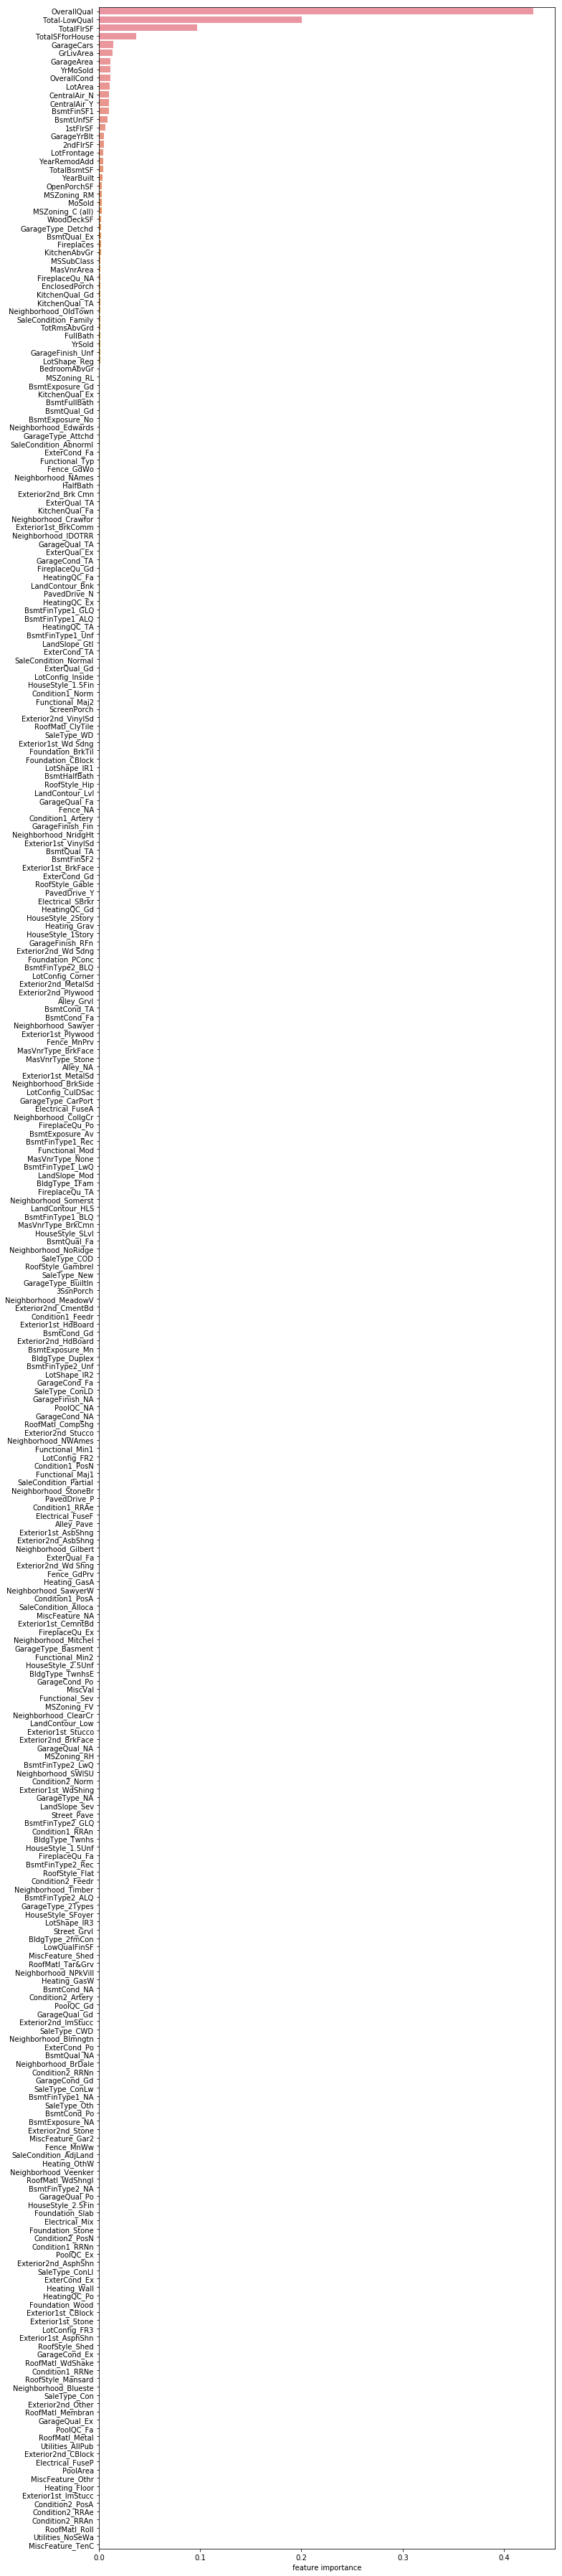

In [16]:
# ある程度特徴量を絞るため、一度ランダムフォレストで重要度を算出する
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 50))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [17]:
# 全体の約半分である上位35位を使用
#ラベリング前のデータをピックアップする
X_train_pickup=X_train.iloc[:,ranking[:10]]
X_test_pickup=X_test.iloc[:,ranking[:10]]

In [18]:
# 図
for i in range(X_train_pickup.shape[1]):
    if X_train_pickup.dtypes[i]==object:
        plt.figure(figsize=(15,10))
        sns.boxplot(x=X_train_pickup.columns[i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1))
        sns.swarmplot(x=X_train_pickup.columns[i],y='SalePrice',data=pd.concat([X_train_pickup,y_train],axis=1))
        plt.show

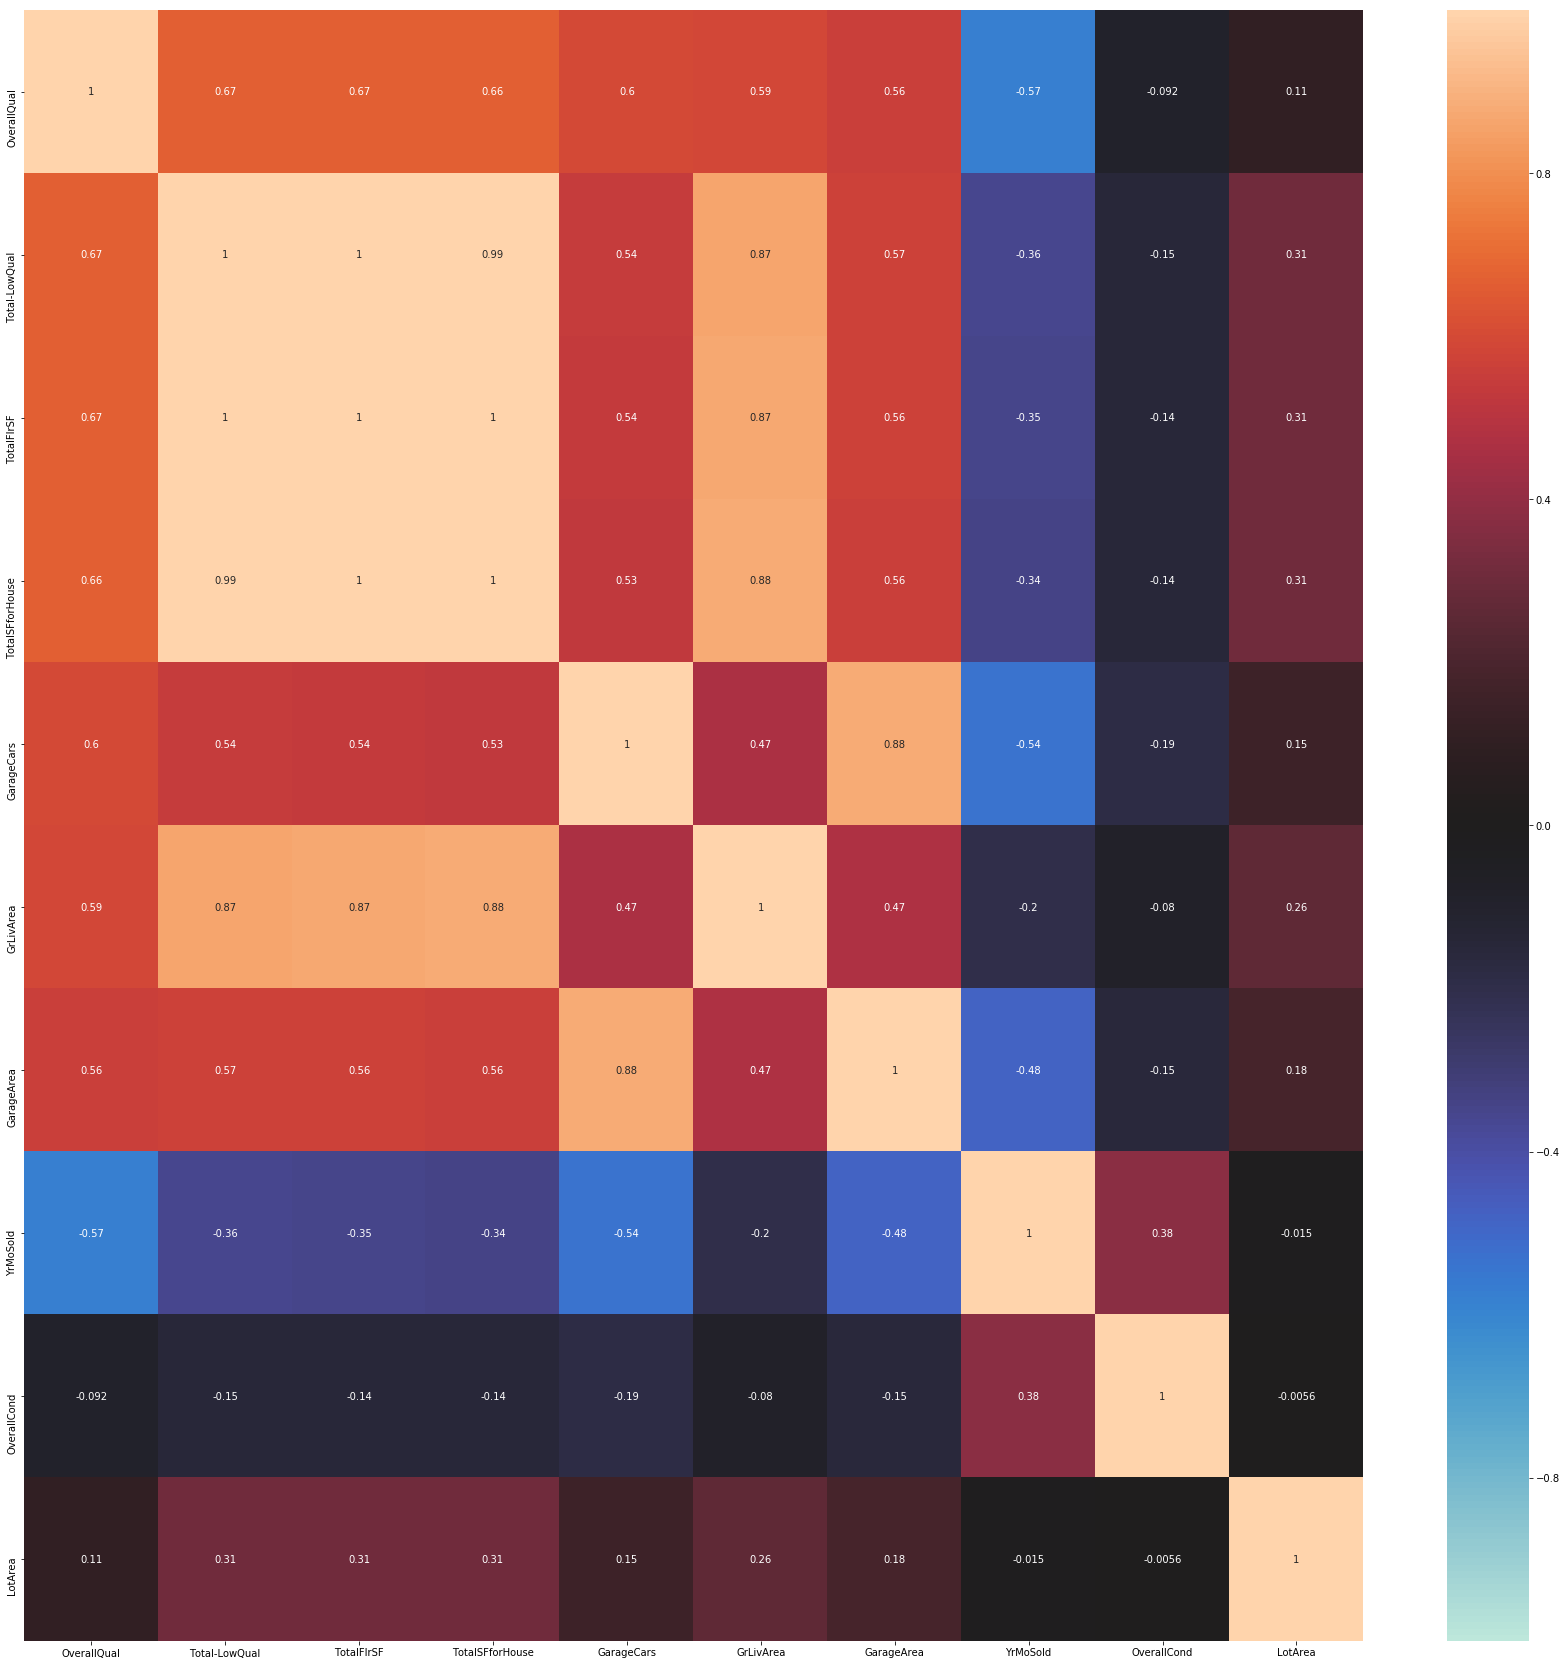

In [19]:
#相関係数行列の可視化
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
sns.heatmap(X_train_pickup.corr(), vmax=1, vmin=-1, center=0, annot=True, ax=ax)

In [20]:
X_train_pickup.columns

Index(['OverallQual', 'Total-LowQual', 'TotalFlrSF', 'TotalSFforHouse',
       'GarageCars', 'GrLivArea', 'GarageArea', 'YrMoSold', 'OverallCond',
       'LotArea'],
      dtype='object')

In [21]:
X_train_pickup.drop(['TotalFlrSF', 'TotalSFforHouse','GrLivArea','GarageArea'],axis=1,inplace=True)#'GrLivArea','GarageArea'
X_test_pickup.drop(['TotalFlrSF', 'TotalSFforHouse','GrLivArea','GarageArea'],axis=1,inplace=True)#'GrLivArea','GarageArea'

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


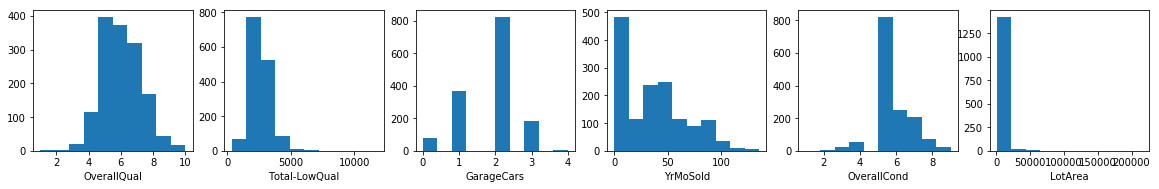

In [22]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.hist(X_train_pickup.iloc[:,i])
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

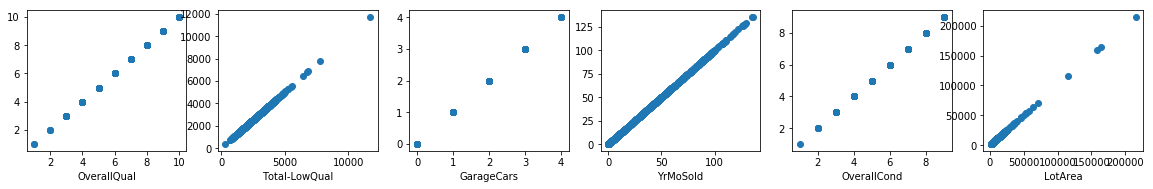

In [23]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], X_train_pickup.iloc[:,i])
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

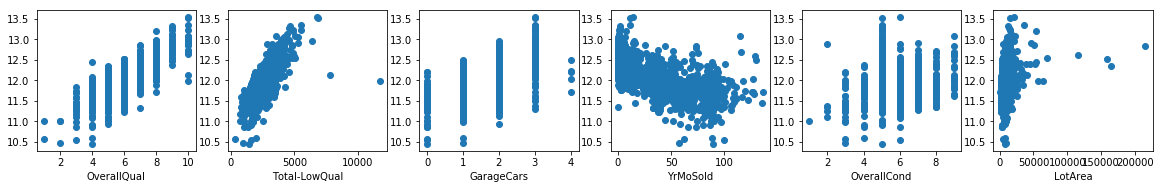

In [24]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], y_train)
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

In [25]:
X_mat = X_train_pickup
X_mat['SalePrice'] = y_train
# X_mat=X_mat.drop(X_mat[(X_mat['TotalFlrSF']>6000)&(X_mat['SalePrice']<12.5)].index)
# X_mat=X_mat.drop(X_mat[(X_mat['GrLivArea']>4000)].index)
X_mat=X_mat.drop(X_mat[(X_mat['OverallQual']<5) & (X_mat['SalePrice']>12.25)].index)
X_mat=X_mat.drop(X_mat[(X_mat['OverallQual']>6) & (X_mat['SalePrice']<11.4)].index)
X_mat=X_mat.drop(X_mat[(X_mat['Total-LowQual']>7500)].index)
X_mat=X_mat.drop(X_mat[(X_mat['OverallCond']<2.5) & (X_mat['SalePrice']>12.5)].index)
# X_mat=X_mat.drop(X_mat[(X_mat['BsmtFinSF1']>4000) & (X_mat['SalePrice']<12.5)].index)
# X_mat.drop(X_mat[(X_mat['TotalFlrSF']>6000)&(X_mat['SalePrice']<12.5)].index,inplace=True)
# X_mat.drop(X_mat[(X_mat['TotalSFforHouse']>6000)&(X_mat['SalePrice']<12.5)].index,inplace=True)
# X_mat=X_mat.drop(X_mat[(X_mat['GarageArea']>1200)&(X_mat['SalePrice']<12.6)].index)


# X_mat=X_mat.drop(X_mat[(X_mat['BsmtFinSF1']>4000)].index)
X_mat=X_mat.drop(X_mat[(X_mat['LotArea']>100000)].index)
# X_mat=X_mat.drop(X_mat[(X_mat['OverallCond']==2)&(X_mat['SalePrice']>12.5)].index)
# X_mat.drop(X_mat[(X_mat['YearBuilt']>110)&(X_mat['SalePrice']>12.3)].index,inplace=True)
# X_mat=X_mat.drop(X_mat[(X_mat['1stFlrSF']>4000)].index)

y_train = X_mat['SalePrice']
X_train_pickup = X_mat.drop(['SalePrice'], axis=1)

/Users/takahashikeiji/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


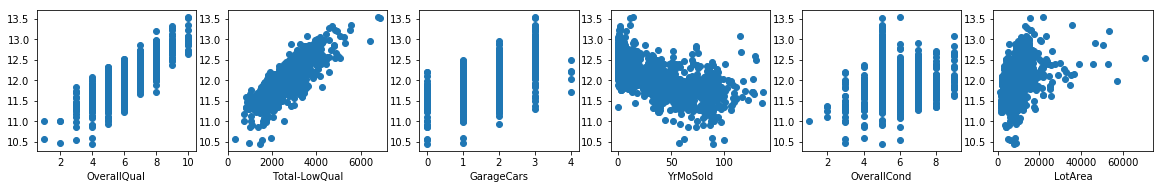

In [26]:
fig=plt.figure(figsize=(20,15))
for i in np.arange(X_train_pickup.shape[1]):
    ax=fig.add_subplot(5,6,i+1)
    plt.scatter(X_train_pickup.iloc[:,i], y_train)
    plt.xlabel(X_train_pickup.columns[i])
plt.show()

In [27]:
# データの分割方法を指定
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits=5, shuffle=True,random_state=0)

In [28]:
from sklearn.model_selection import train_test_split
X_train_sp,X_test_sp,y_train_sp,y_test_sp=train_test_split(X_train_pickup,y_train,test_size=0.3,random_state=0)
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_sp,y_train_sp)
# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(np.exp(y_train_sp), np.exp(lr.predict(X_train_sp))) ** (1/2)))
print('test : %.3f' % (mse(np.exp(y_test_sp), np.exp(lr.predict(X_test_sp))) ** (1/2)))

RMSE
train: 26362.966
test : 23610.676


In [29]:
#モデルの呼び出し
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import svm
lasso = Lasso()
rf = RandomForestRegressor()
svr = svm.SVR()

In [30]:
from sklearn.model_selection import GridSearchCV, train_test_split
#グリッドサーチ用パラメータの設定
lasso_parameters = {'alpha':[1e-5,1e-4,0.1]}
rf_parameters= {'n_estimators':[100, 500,1000,1500], 'max_depth':[3, 5, 15,20]}
svr_parameters = {"C": [1e-1,1e0, 1e1,1e2],"gamma": [1e-8,1e-7,1e-6,1e-5]}

In [31]:
# グリッドサーチ
lasso_gs = GridSearchCV(lasso, lasso_parameters,cv=kf_5)
lasso_gs.fit(X_train_sp,y_train_sp)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [32]:
rf_gs = GridSearchCV(rf, rf_parameters,cv=kf_5)
rf_gs.fit(X_train_sp,y_train_sp)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 500, 1000, 1500], 'max_depth': [3, 5, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
svr_gs = GridSearchCV(svr, svr_parameters,cv=kf_5)
svr_gs.fit(X_train_sp,y_train_sp)
print(lasso_gs.best_params_)
print(rf_gs.best_params_)
print(svr_gs.best_params_)

{'alpha': 0.0001}
{'max_depth': 15, 'n_estimators': 500}
{'C': 100.0, 'gamma': 1e-08}


In [34]:
#ラッソ回帰
y_pred = lasso_gs.predict(X_test_sp)
y_pred_t=lasso_gs.predict(X_train_sp)
print("ラッソ回帰でのRMSE:%.3f",(mse(np.exp(y_test_sp), np.exp(y_pred))**(1/2)))
print(mse(np.exp(y_train_sp), np.exp(y_pred_t))**(1/2))
#ランダムフォレスト
y_pred2 = rf_gs.predict(X_test_sp)
y_pred2_t=rf_gs.predict(X_train_sp)
# ランダムフォレスト
print('train,test')
print("ランダムフォレスト:train",(mse(np.exp(y_train_sp), np.exp(y_pred2_t)))**(1/2))
print("test:",mse(np.exp(y_test_sp), np.exp(y_pred2))**(1/2))
# print("ランダムフォレストでのRMSE:%.3f"(mse(y_test_sp, y_pred2)**(1/2)))
#SVR
y_pred3 = svr_gs.predict(X_test_sp)
y_pred3_t=svr_gs.predict(X_train_sp)
print("SVRでのRMSE:train",(mse(np.exp(y_train_sp), np.exp(y_pred3_t))**(1/2)))
print(mse(np.exp(y_test_sp), np.exp(y_pred3))**(1/2))

ラッソ回帰でのRMSE:%.3f 23612.232743867415
26367.31906169669
train,test
ランダムフォレスト:train 10453.098229152383
test: 27252.270429730284
SVRでのRMSE:train 35101.03416639772
35809.19200702428


In [37]:
# XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
xgb_gs = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6,8],
                    'n_estimators': [5,10,25,50,100,200,250]},cv=kf_5, verbose=1)
xgb_gs.fit(X_train_sp, y_train_sp)
print(reg_xgb.best_params_)

Parameter optimization
Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'max_depth': 2, 'n_estimators': 200}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.1s finished


In [38]:
y_predx_t=xgb_gs.predict(X_train_sp)
y_predx=xgb_gs.predict(X_test_sp)
print(mse(np.exp(y_train_sp), np.exp(y_predx_t))**(1/2))
mse(np.exp(y_test_sp), np.exp(y_predx))**(1/2)

20703.354580901658


25340.13861428468

In [68]:
# スタッキング
X_train_stk = pd.DataFrame( {'XGB': xgb_gs.predict(X_train_sp),
                             'LASSO': lasso_gs.predict(X_train_sp),
                             'SVR':svr_gs.predict(X_train_sp),
                             'RF':rf_gs.predict(X_train_sp),
     'LR': lr.predict(X_train_sp),
    })
X_test_stk = pd.DataFrame( {'XGB': xgb_gs.predict(X_test_sp),
                            'LASSO': lasso_gs.predict(X_test_sp),
                             'SVR':svr_gs.predict(X_test_sp),
                             'RF':rf_gs.predict(X_test_sp),
     'LR': lr.predict(X_test_sp),
    })

In [84]:
from sklearn.linear_model import LinearRegression
lr_stk=LinearRegression()

lr_stk.fit(X_train_stk,y_train_sp)
y_pred_stk=lr_stk.predict(X_test_stk)

print(mse(np.exp(y_train_sp), np.exp(lr_stk.predict(X_train_stk)))**(1/2))
print(mse(np.exp(y_test_sp), np.exp(y_pred_stk))**(1/2))

8370.602850659101
30187.839012092627


In [ ]:
rf_stk=RandomForestRegressor()
rf_parameters_stk= {'n_estimators':[100,250,500], 'max_depth':[3,4,5,6]}
rf_gs_stk=GridSearchCV(rf_stk, rf_parameters_stk,cv=kf_5)

rf_gs_stk.fit(X_train_stk,y_train_sp)
y_pred_stk_rf=rf_gs_stk.predict(X_test_stk)

In [83]:
print(mse(np.exp(y_train_sp), np.exp(rf_gs_stk.predict(X_train_stk)))**(1/2))
print(mse(np.exp(y_test_sp), np.exp(y_pred_stk_rf))**(1/2))

6637.138952469755
29546.84838326002


In [82]:
rf_gs_stk.best_params_

{'max_depth': 6, 'n_estimators': 500}

In [85]:
# XGBoost
import xgboost as xgb

print("Parameter optimization")
xgb_model = xgb.XGBRegressor()
xgb_gs_stk = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6,8],
                    'n_estimators': [5,10,25,50,100,200,250,300,350]},cv=kf_5, verbose=1)
xgb_gs_stk.fit(X_train_stk, y_train_sp)
print(xgb_gs_stk.best_params_)

Parameter optimization
Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 4, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   20.8s finished


In [86]:
y_pred_xgb_stk=xgb_gs_stk.predict(X_train_stk)
y_pred_test_xgb_stk=xgb_gs_stk.predict(X_test_stk)
print(mse(np.exp(y_train_sp), np.exp(y_pred_xgb_stk))**(1/2))
mse(np.exp(y_test_sp), np.exp(y_pred_test_xgb_stk))**(1/2)

3588.336981836906


30561.668736101263

In [63]:
submission = pd.DataFrame({
    "Id": test_data['Id'],
    "SalePrice": y_pred_a
})
submission.to_csv('houseprice1.csv', index=False)

NameError: name 'y_pred_a' is not defined